# Step 1: Base Model Training

## 1. Import Dependencies

Let's start by importing the necessary tools for our training process.

In [109]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

warnings.filterwarnings('ignore')

## 2. Load Processed Data

We'll load the clean and balanced data we prepared in the previous step.

In [110]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

print("Data loaded successfully from artifacts.")

Data loaded successfully from artifacts.


## 3. Train Logistic Regression Model

We will train a simple **Logistic Regression** model. This will be our baseline to see how well a basic model performs.

### Mnemonic: **T-P-E** (Train, Predict, Evaluate)
*   **T** - **Train** the model using our training data.
*   **P** - **Predict** the outcomes for the test data.
*   **E** - **Evaluate** how well the model performed.

In [111]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

model_lr.fit(X_train, Y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## 4. Make Predictions

Now, let's use our trained model to make predictions on the test set.

In [112]:
Y_hat_test = model_lr.predict(X_test)
print("Predictions generated for the test set.")

Predictions generated for the test set.


## 5. Evaluate Model Performance

Let's see how our model did. We will look at a few key metrics:
*   **Accuracy**: How often the model is correct overall.
*   **Precision**: When the model predicts "Churn", how often is it right?
*   **Recall**: Of all the customers who actually churned, how many did the model find?
*   **F1-Score**: A single score that balances Precision and Recall.

In [113]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

print("--- Model Performance Metrics ---")
print(f"| Metric    | Score   |")
print(f"|-----------|---------|")
print(f"| Accuracy  | {accuracy:.4f}  |")
print(f"| Precision | {precision:.4f}  |")
print(f"| Recall    | {recall:.4f}  |")
print(f"| F1-Score  | {f1:.4f}  |")
print("---------------------------------")

--- Model Performance Metrics ---
| Metric    | Score   |
|-----------|---------|
| Accuracy  | 0.6948  |
| Precision | 0.3423  |
| Recall    | 0.6755  |
| F1-Score  | 0.4544  |
---------------------------------


### 5.1. Confusion Matrix

The **Confusion Matrix** gives us a visual breakdown of our model's predictions.

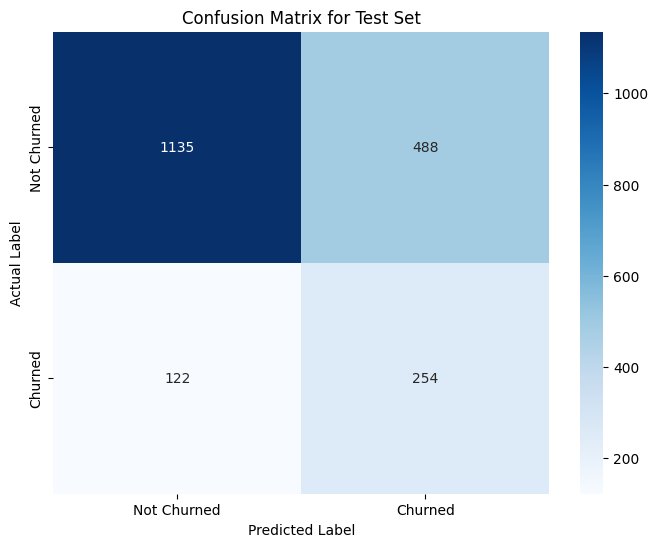

In [114]:
cm = confusion_matrix(Y_test, Y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Set')
plt.show()